In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

**Note that this lecture is currently incomplete; if you come back to the page and this message is gone, you can consider it complete.**

# Introduction to this course; "numeracy"

## What are "statistical methods," and why do we need them?

To address this, let's breakdown the course title into three pieces:

1. "Statistical"
2. "Methods"
3. "in Earth and Atmospheric Sciences"

### "Statistical"

Imagine a very simple dataset: "Whether or not it rained more than one foot in Central Park on August 15, 2023".  It consists of a single value: `No` (you can take my word for it). 

We don't need anything complicated to characterize it.  As the saying goes, in this rather odd instance, the data "speaks for itself."

Now let's look at a more realistic dataset: the actual daily precipitation as measured by the [Central Park weather station](https://w1.weather.gov/data/obhistory/KNYC.html).  This record spans from the year 1869 to today.  Does this data "speak for itself"?  

If it did, we could just print out its values, take it all in, and be pleased with ourselves.  Let's try that using Python, the programming language that we'll use throughout this course (if the lines of code below seem mysterious or confusing to you, just set that aside for now, and trust that we've used them to load daily data from the Central Park weather station):

In [2]:
import xarray as xr

In [3]:
filepath_in = "../data/central-park-station-data.nc"
ds_central_park = xr.open_dataset(filepath_in)
precip_central_park = ds_central_park["precip"]

In [4]:
print(f"# of values in the dataset: {len(precip_central_park)}")

# of values in the dataset: 56428


That's probably more than we can take in by eye.  Let's try anyways:

In [5]:
import numpy as np

# Need this so that it actually prints all the values rather than just a few.
with np.printoptions(threshold=np.inf):
    print(precip_central_park.values)

[0.75 0.03 0.   0.18 0.05 0.   0.   0.   0.   0.01 0.   0.85 0.   0.
 0.04 0.   0.   0.   0.15 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.47 0.   0.   0.   0.   1.55 0.   0.   0.   0.   0.   0.85 0.05
 0.   0.   0.   2.6  0.   0.   0.54 0.06 0.   0.   0.   0.56 0.   0.
 0.66 0.   0.   0.   0.02 0.   0.1  0.   0.03 0.   0.   0.   1.06 0.
 0.   0.   0.02 0.18 0.   0.   0.   0.   0.28 0.   0.   0.95 0.   0.
 0.   0.78 0.   0.   1.15 0.04 0.01 0.43 0.   0.   0.   0.   0.3  0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.   0.12 0.08 0.
 0.   0.   0.   0.   0.   0.05 0.36 0.   0.58 0.7  0.02 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.12 0.   0.15 0.5  0.   0.   0.87 0.
 0.27 0.19 0.   0.   0.   0.4  0.   0.07 0.   0.14 0.14 0.   0.08 0.
 0.   0.08 0.   0.   0.33 0.   0.19 0.01 0.01 0.   0.93 0.06 0.   0.
 0.   0.   0.   1.53 0.02 0.   0.01 0.   0.02 0.67 0.2  0.   0.26 0.
 0.   0.42 0.   0.   0.   0.   0.   0.52 0.   0.   0.   0.1  0.18 0.05
 0.38 0.   0.   0.   0.04 0.64

That's definitely way too much for the data to "speak for itself".  In fact, that's true for anything more than one or two data points.  Moreover, while more than 50,000 data points may sound like a lot, in the Earth Sciences it's not uncommon to work with datasets with millions or even billions of points.

Pretty much always, we need to translate our raw data into digestible chunks: individual numbers and plots that capture key things about the dataset we want to know.  And that's exactly what statistics provides.

Maybe that's being unfair.  Of course "speak for itself" doesn't mean dumping the numerical values out, it means plotting them!  So let's try that:

In [6]:
# First, import the matplotlib package that we'll use for plotting.
from matplotlib import pyplot as plt

In [7]:
# Then update the plotting aesthetics using my own custom package named "puffins"
# See: https://github.com/spencerahill/puffins
from puffins import plotting as pplt
plt.rcParams.update(pplt.plt_rc_params_custom)

Text(0, 0.5, 'daily precip [inches]')

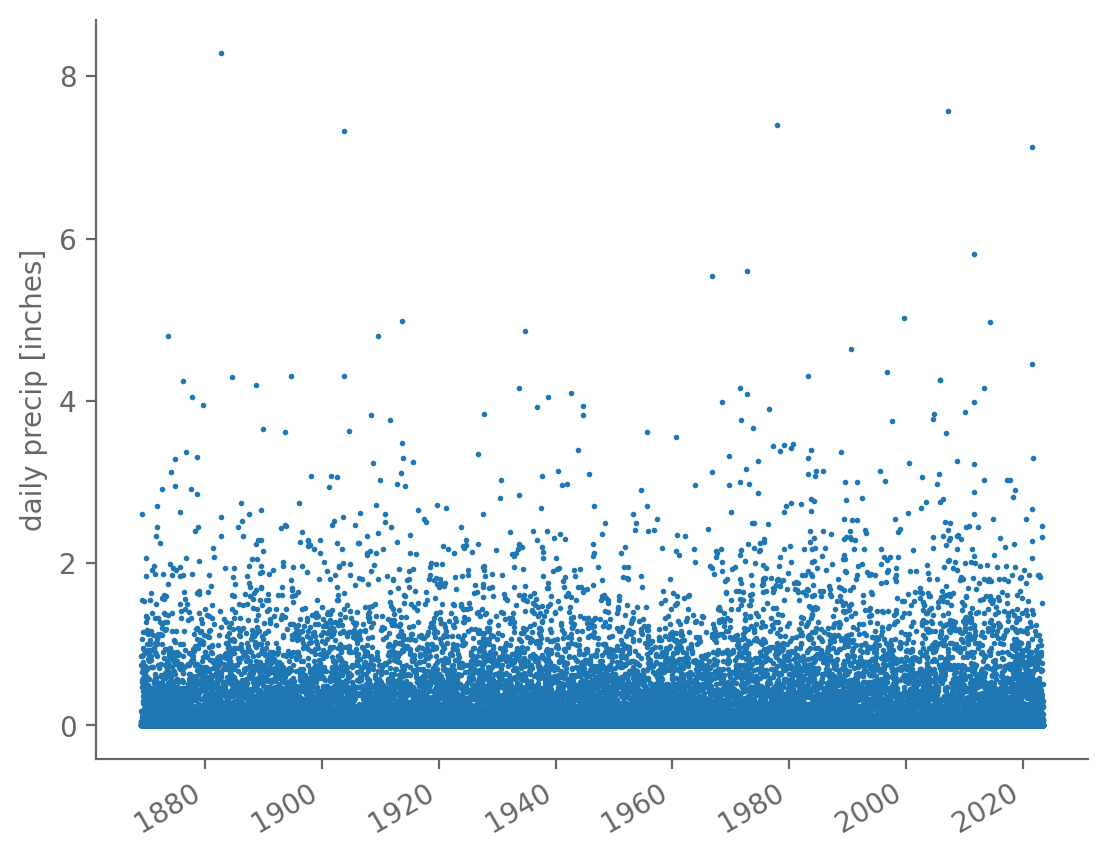

In [40]:
# Create the figure and the axes that the data will be plotted on.
fig = plt.figure()
ax = fig.subplots()

# Now actually plot the data.
precip_central_park.plot(ax=ax, linestyle="none", marker=".", markersize=2)
ax.set_xlabel("")
ax.set_ylabel("daily precip [inches]")

In [41]:
fig.savefig("../images/cp-precip-daily-ts_1869-2023.pdf")

Text(0, 0.5, 'daily precip [inches]')

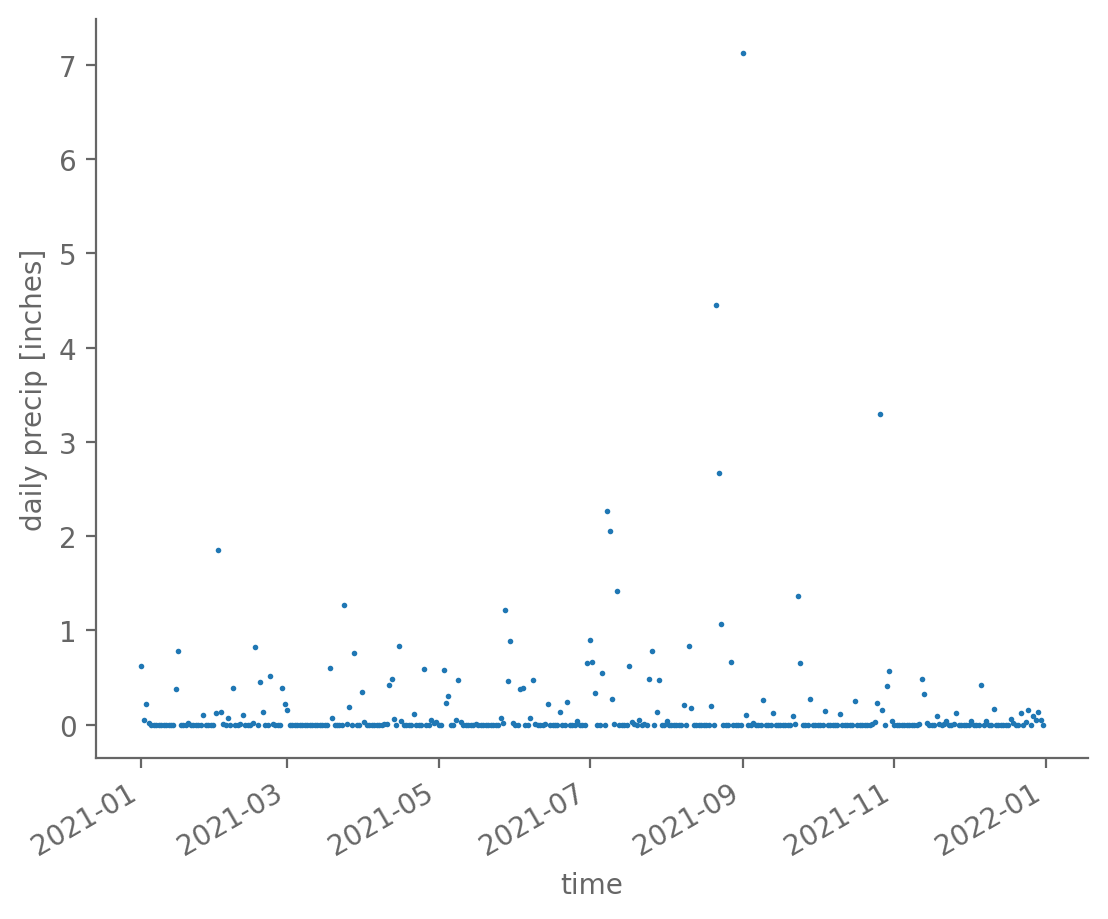

In [32]:
fig = plt.figure()
ax = fig.subplots()
precip_central_park.sel(time=slice("2021", "2021")).plot(linestyle="none", marker=".", markersize=2)
ax.set_ylabel("daily precip [inches]")

In [33]:
fig.savefig("../images/cp-precip-daily-ts_2021.pdf")

Much better.  There's now quite a lot we can infer, right away:

- The highest value ever recorded was over 8 inches, somewere just after 1880
- There have been five total times it exceeded 6 inches
- It's "jumpy": values can go from very low (including zero) to very high from one day to the next or from very high to very low
- There's not an obvious strong seasonal signal

BUT there's still so much more we can't infer.

- Is there a long term increasing or decreasing trend that we could be confident of?
- Despite the overall "jumpiness," and lack of strong seasonality, are there discernible cycles (e.g. every four weeks, three years or 2 decades) where values tend to be higher or lower than the long-term average?

AND we haven't actually let the data speak for itself: we chose to plot it in a particular way, as a timeseries.  But there are other ways, and these change what things you can and can't infer!

Let's compare this to the dailly average air temperature data from the same Central Park dataset:

In [12]:
temp_central_park = ds_central_park["temp_avg"]

Text(0, 0.5, 'daily temperature [Fahrenheit]')

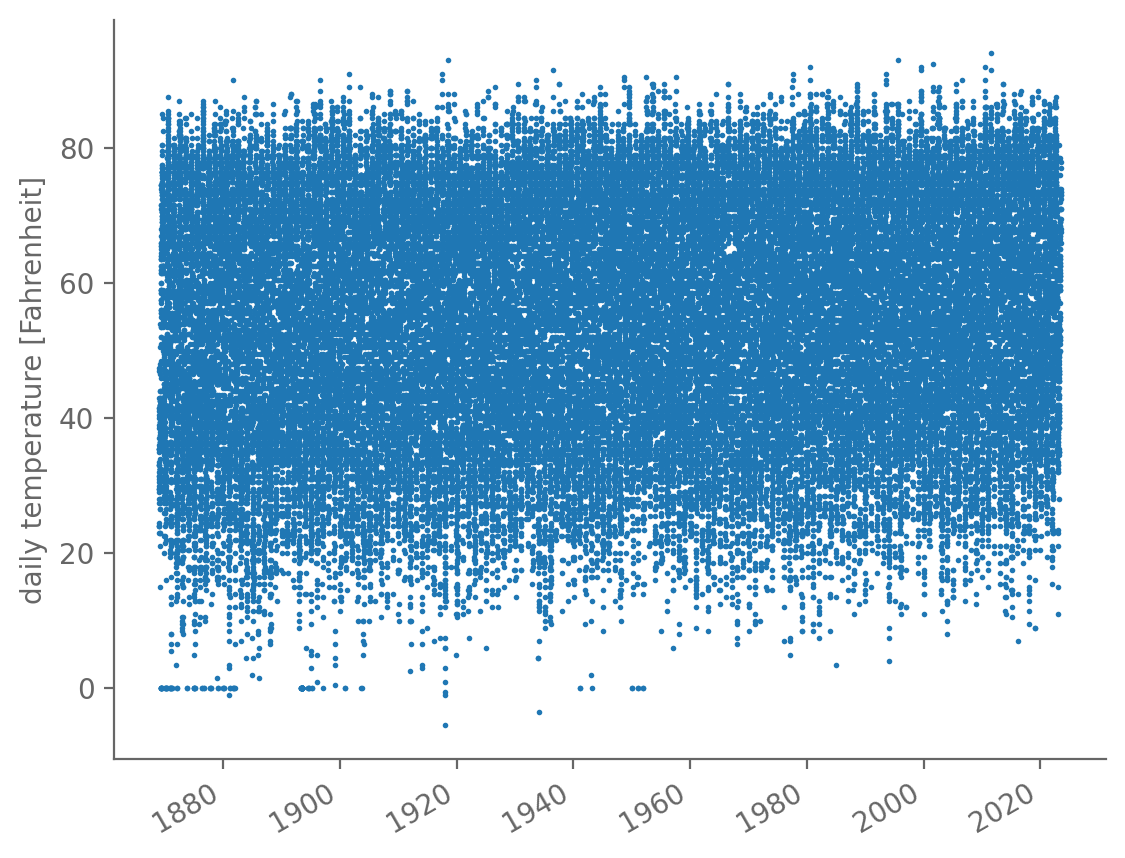

In [38]:
fig = plt.figure()
ax = fig.subplots()
temp_central_park.plot(linestyle="none", marker=".", markersize=2)
ax.set_xlabel("")
ax.set_ylabel("daily temperature [Fahrenheit]")

In [39]:
fig.savefig("../images/cp-temp-avg-daily-ts_1869-2023.pdf")

Text(33.88125, 0.5, 'daily temperature [Fahrenheit]')

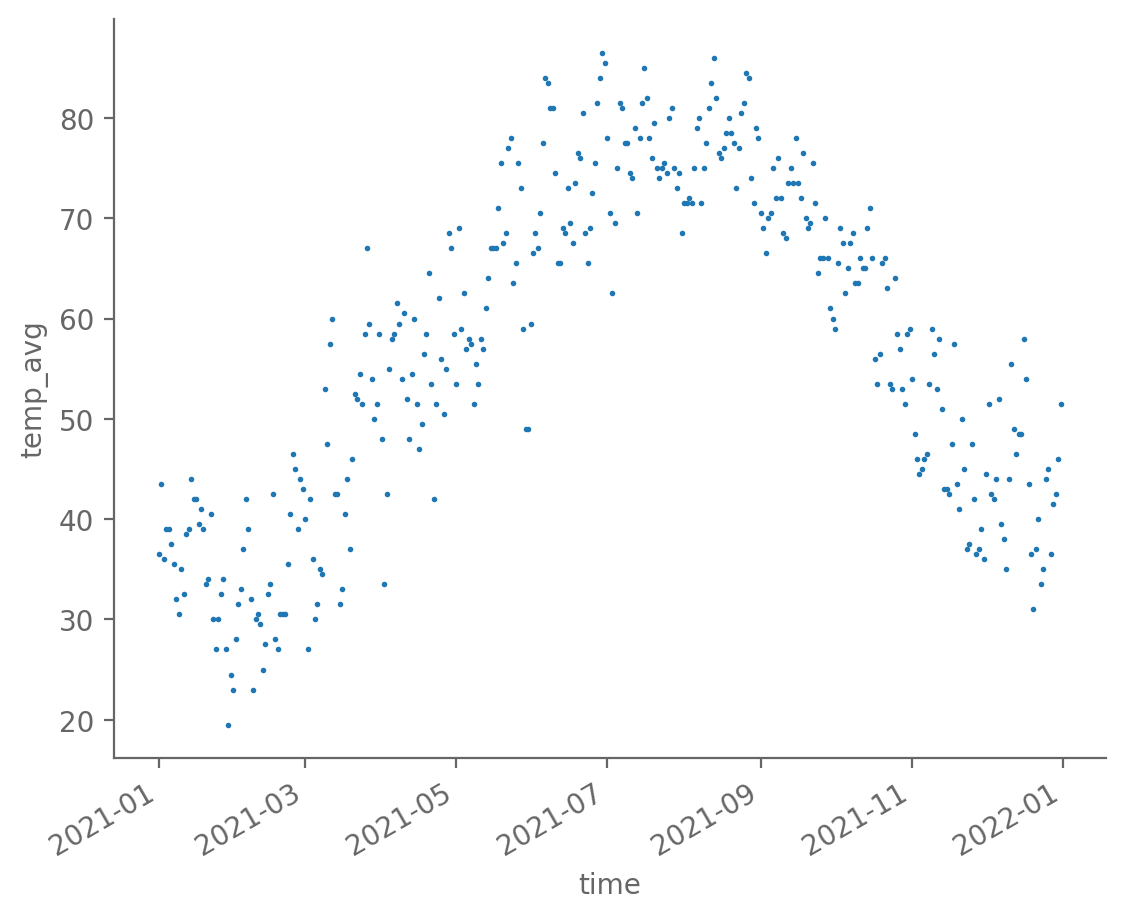

In [36]:
temp_central_park.sel(time=slice("2021", "2021")).plot(linestyle="none", marker=".", markersize=2)
ax.set_ylabel("daily temperature [Fahrenheit]")

In [37]:
fig.savefig("../images/cp-temp-avg-daily-ts_2021.pdf")

### "Methods"

Think of "methods" as just another word for "tools."  As such, what we're after in this course is building a toolkit of statistical techniques that will be valuable to you in your research and other coursework.  This has some important implications:

- We'll focus *less* on the underlying theoretical basis for the techniques we'll discuss.  Just enough to be confident in their meaning, their conceptual basis, and their interpretation.
- We'll focus *more* on implementing them IRL (in real life).  That means coding them up and using them to analyze real datasets from the Earth sciences.
- We'll devote time not just to specific analysis techniques, but all the other steps in the pipeline from a raw data file to accurately generated statistical measures and pretty plots.  That includes things like:
  - setting up your computational environment (python, conda, jupyter, ...)
  - dealing with different file formats (netCDF, CSV, .xls, grib, ...)
  - cleaning your data (missing data, clearly wrong data, probably wrong data, ...)
  - computer performance, i.e. making your calculations run in a reasonable amount of time (vectorized routines, parallelization, ...)

### "in Earth and Atmospheric Sciences"

Of course, being in the EAS department, we will focus almost exclusively on datasets and problems that arise in the Earth and Atmospheric Sciences (as opposed to say, medicine).  And my own research emphasis with EAS is on rainfall and how it varies on many timescales (day to day, season to season, year to year, etc.), which will bias the example datasets used in that direction.  Finally, at *The* City College of New York after all, we'll use data from our own backyard as much as possible.

But the overall approach---how to characterize datasets as succinctly and accurately as possible, individually and as they relate to one another---is universally applicable.  Likewise for the vast majority of the individual tools themselves; with modest effort nearly all of them can be adapted to a wide array of datasets, e.g. time series of economic data, astronomical data from telescopes, biometric data from your smart watch.

## Why care about statistics at all?

Why bother with things like conditional probabilities, autocorrelations, covariance matrices, etc., which especially if you haven't heard of them before might sound like kind of a pain?  Well, virtually every major problem in the Earth sciences---and in fact, virtually every major problem facing the world---ultimately has a statistical basis.

In the Earth sciences, that includes all of the following questions:

- Are extreme rainfall events in New York City becoming more frequent?
- How does the El Niño-Southern Oscillation influence wintertime temperatures in East Asia?
- In ice core records of Earth's climate going back thousands and millions of years, are there key recurring cycles, and if so how long do they last?
- What is the relationship between air pollution and child asthma?
  - Based on that, is there a meaningful difference in child asthma incidence in Harlem vs. the Upper East Side that can be attributed to different levels of air pollution in the two places?

## Numeracy